In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as l

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/kaggle/input/mall-data/Shopping Mall Customer Segmentation Data .csv")
df

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76
...,...,...,...,...,...
15074,a0504768-a85f-4930-ac24-55bc8e4fec9e,29,Female,97723,30
15075,a08c4e0e-d1fe-48e7-9366-aab11ae409cd,22,Male,73361,74
15076,0e87c25a-268c-401a-8ba1-7111dcde6f1a,18,Female,112337,48
15077,5f388cbe-3373-4e16-b743-38f508f2249f,26,Female,94312,5


<Axes: xlabel='Annual Income', ylabel='Spending Score'>

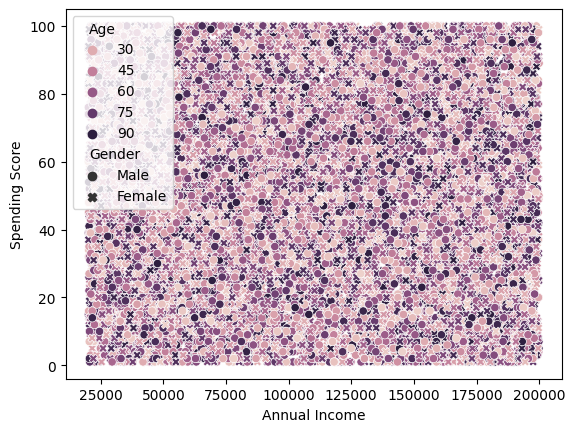

In [4]:
sns.scatterplot(data=df,x='Annual Income',y='Spending Score',hue='Age',style='Gender')

In [5]:
df.isnull().values.any()

False

In [6]:
features = ['Age','Annual Income','Spending Score']
data=df[features].copy()
data.head()

,Age,Annual Income,Spending Score
0,30,151479,89
1,58,185088,95
2,62,70912,76
3,23,55460,57
4,24,153752,76


In [7]:
data.max()

Age                   90
Annual Income     199974
Spending Score       100
dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(1, 10))

In [9]:
scaler.fit(data)

MinMaxScaler(feature_range=(1, 10))

In [10]:
data=scaler.transform(data)

In [11]:
data=pd.DataFrame(data=data, columns=features)

In [12]:
# data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [13]:
data.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,5.523949,5.487241,5.508329
std,2.639901,2.613168,2.611543
min,1.000000,1.000000,1.000000
25%,3.250000,3.206538,3.272727
50%,5.500000,5.459589,5.545455
75%,7.750000,7.751100,7.727273
max,10.000000,10.000000,10.000000


In [14]:
data.head()

,Age,Annual Income,Spending Score
0,2.500,7.574603,9.000000
1,6.000,9.255501,9.545455
2,6.500,3.545179,7.818182
3,1.625,2.772373,6.090909
4,1.750,7.688284,7.818182


In [15]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [16]:
centroids = random_centroids(data, 3)

In [17]:
centroids

,0,1,2
Age,7.750000,1.125000,3.250000
Annual Income,1.158692,5.550063,9.398390
Spending Score,4.090909,7.545455,7.909091


In [18]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [19]:
labels = get_labels(data, centroids)
labels.value_counts()

0    6088
2    5081
1    3910
Name: count, dtype: int64

In [20]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

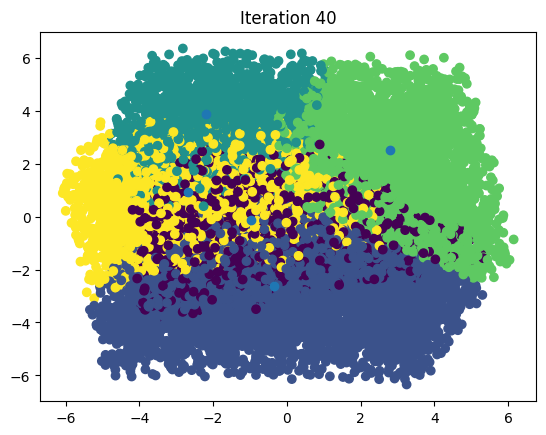

In [21]:
max_iterations = 100
centroid_count = 5

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [22]:
labels.value_counts()

1    4488
3    3498
4    2882
0    2444
2    1767
Name: count, dtype: int64

In [23]:
cluster1=df[labels == 0][['Customer ID','Gender']+features]
cluster1

,Customer ID,Gender,Age,Annual Income,Spending Score
5,7e211337-e92f-4140-8231-5c9ac7a2aa12,Male,42,158335,40
6,30661d57-eeb5-4886-970a-9c7d0f260ad8,Female,27,163501,37
20,05948202-e483-482a-9c02-6a655498002b,Male,21,199879,49
22,dd6223b5-5aae-468b-b936-618b513d4e70,Male,24,109188,6
25,65348b4f-9170-4edc-b035-cc484416face,Female,19,192492,57
...,...,...,...,...,...
15046,5f2e86a3-d244-488b-ad36-c79cf46be46b,Female,35,192517,34
15047,7a509b25-8e2f-4907-a2d9-7e90723528c6,Female,50,190722,7
15059,f4fdd6f7-f6cb-4c23-9964-6c715c754d8b,Female,26,179159,55
15065,f7a9e3f8-4567-4fd9-82ae-00469fec391a,Female,72,173180,2


In [24]:
cluster1.describe()

,Age,Annual Income,Spending Score
count,2444.000000,2444.000000,2444.000000
mean,40.448445,156897.903846,24.063421
std,15.274652,27101.370515,14.875843
min,18.000000,101535.000000,1.000000
25%,27.000000,134776.750000,12.000000
50%,39.000000,159313.500000,23.000000
75%,52.000000,179983.500000,35.000000
max,84.000000,199934.000000,62.000000


<Axes: >

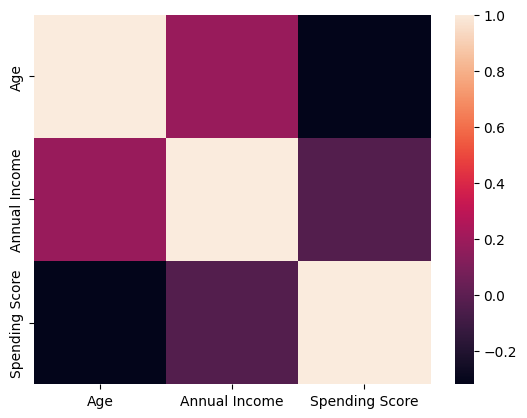

In [25]:
sns.heatmap(cluster1.corr(numeric_only=True))

In [26]:
cluster2=df[labels == 1][['Customer ID','Gender']+features]
cluster2

,Customer ID,Gender,Age,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,Male,30,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,Female,58,185088,95
4,64139426-2226-4cd6-bf09-91bce4b4db5e,Male,24,153752,76
10,49ba3e9d-a590-4303-b443-e794d0364c11,Male,37,170566,75
13,caa4ad5a-51b2-4af1-91cb-e2802f620239,Female,32,159892,96
...,...,...,...,...,...
15050,fd3e05a0-fc2e-459e-852c-865b6d347fd8,Male,57,181803,86
15051,4390d80e-240c-405e-b7e9-b99f8e2a233b,Male,41,113944,61
15056,38fa5453-b383-4758-bb59-36ee6c83a599,Male,50,161805,43
15062,1a53a4a4-c16b-4386-bf28-5842cd3f3f9b,Female,24,166849,74


In [27]:
cluster2.describe()

,Age,Annual Income,Spending Score
count,4488.000000,4488.000000,4488.000000
mean,58.187611,152668.747995,72.012701
std,19.561496,29326.809297,17.302074
min,18.000000,74210.000000,27.000000
25%,43.000000,129895.750000,59.000000
50%,60.000000,154686.500000,73.000000
75%,74.250000,177478.250000,87.000000
max,90.000000,199974.000000,100.000000


In [28]:
cluster3=df[labels == 2][['Customer ID','Gender']+features]
cluster3

,Customer ID,Gender,Age,Annual Income,Spending Score
7,43417ade-6b17-431e-ae76-d8ed26aa46ac,Male,24,70476,17
12,eb0e4ebc-fcc1-424f-b083-81987583ecc6,Male,25,87576,17
19,baa61fc0-4a1f-4210-916b-669d1ec44dbd,Male,26,45518,12
23,9c702610-d6ce-48fe-9857-9e295e161ceb,Female,39,48212,36
43,3e260c72-5788-4641-8dad-9cc7a4eaafef,Male,45,82425,39
...,...,...,...,...,...
15067,33f77ca2-9eee-4e60-b5dc-9b95365b10f3,Male,32,59424,26
15072,02da8108-fe4f-4300-a4d3-e2210f8d240f,Female,35,105107,49
15074,a0504768-a85f-4930-ac24-55bc8e4fec9e,Female,29,97723,30
15077,5f388cbe-3373-4e16-b743-38f508f2249f,Female,26,94312,5


In [29]:
cluster3.describe()

,Age,Annual Income,Spending Score
count,1767.000000,1767.000000,1767.000000
mean,35.126769,60261.563101,25.575552
std,10.437638,24347.113503,14.486211
min,18.000000,20177.000000,1.000000
25%,26.000000,39796.000000,13.000000
50%,35.000000,58327.000000,26.000000
75%,44.000000,80831.500000,38.000000
max,57.000000,108259.000000,53.000000


In [30]:
cluster4=df[labels == 3][['Customer ID','Gender']+features]
cluster4

,Customer ID,Gender,Age,Annual Income,Spending Score
8,86f73b1a-6a91-4d7e-ad21-0aefcf6111cc,Male,83,47743,34
9,b20fe0a0-e254-4116-b804-5403bb2f59ea,Female,62,63448,3
18,8bbbdbbe-7f8a-4c9c-afed-f6969f49e9ac,Male,65,87270,3
26,c2fd4929-fc3e-423a-8dd9-1fb239ef4de6,Male,79,109550,7
27,eb6d1dfc-5b3a-4ade-8521-71db4659ad13,Female,61,38132,15
...,...,...,...,...,...
15060,36acd568-9b2b-45ab-b10b-2aeb10ef88fc,Female,79,126265,23
15061,690747f5-9039-43b6-b959-3575661f532a,Male,81,70574,35
15066,7051c7e2-5864-470c-9cea-15e5d6f9efcf,Female,69,32370,39
15068,2b5361cb-9fe3-4129-aab5-fb6c45e22051,Female,71,65773,60


In [31]:
cluster4.describe()

,Age,Annual Income,Spending Score
count,3498.000000,3498.000000,3498.000000
mean,75.618067,85772.781304,32.277301
std,10.018424,41389.342242,20.351930
min,51.000000,20089.000000,1.000000
25%,68.000000,52121.500000,16.000000
50%,77.000000,81928.000000,30.000000
75%,84.000000,112952.500000,46.000000
max,90.000000,199510.000000,91.000000


In [32]:
# from sklearn.metrics import silhouette_score
# # from sklearn.datasets import load_iris
# from sklearn.cluster import KMeans

   
# for n_cluster in range(2, 11):
#     kmeans = KMeans(n_clusters=n_cluster).fit(data)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(data, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

In [33]:
# sse = {}
# for k in range(1, 10):
#     kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
#     data["clusters"] = kmeans.labels_
#     #print(data["clusters"])
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
# plt.figure()
# plt.plot(list(sse.keys()), list(sse.values()))
# plt.xlabel("Number of cluster")
# plt.ylabel("SSE")
# plt.show()

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [36]:
a=kmeans.get_feature_names_out()

In [37]:
a[0]

'kmeans0'

# **Without scikit-learn**

In [38]:
centroids

,0,1,2,3,4
Age,3.300242,5.375020,2.839813,8.100731,3.814675
Annual Income,7.722847,7.483043,2.745196,3.754136,2.822584
Spending Score,2.781874,7.276483,2.929846,3.375171,7.817531


# **With scikit-learn**

In [35]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2,3,4
Age,3.135727,5.369359,3.344443,8.013523,7.736479
Annual Income,7.990139,3.153847,3.342145,5.226174,7.611409
Spending Score,5.416035,8.005958,3.476768,3.106239,7.452070


In [39]:
new_data=np.array([[8,7.5,5.74]])

In [40]:
kmeans.predict(new_data)

array([4], dtype=int32)

In [41]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler(feature_range=(1, 10))

In [42]:
dd=np.array([[84,50000,50]])

In [43]:
scaled_data = scaler.transform(dd)
scaled_data

array([[9.25      , 2.49929981, 5.45454545]])

In [44]:
kmeans.predict(scaled_data)

array([3], dtype=int32)

In [55]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [56]:
X=df.drop(columns=['Customer ID','Gender'])

In [58]:
X.shape

(15079, 3)

In [59]:
from sklearn.compose import make_column_transformer
# Pipeline
from sklearn.pipeline import make_pipeline

In [60]:
column_trans = make_column_transformer(
    #(OHE, ['Gender']),
    (scaler, ['Age', 'Annual Income', 'Spending Score']),
    remainder='passthrough')

In [61]:
column_trans.fit_transform(X);

In [62]:
k_range = range(1,10)
sse = []
for i in k_range:
    Kmeans = KMeans(n_clusters=i, random_state=0)
    pipe = make_pipeline(column_trans, Kmeans)
    pipe.fit_predict(X)
    sse.append(pipe[1].inertia_)

In [64]:
sse

[310876.4492487772,
 232070.59423977695,
 184872.6448207988,
 147666.03727281038,
 123752.45322756603,
 102312.23381667372,
 89601.62020284159,
 77758.77245213836,
 72918.38021587879]

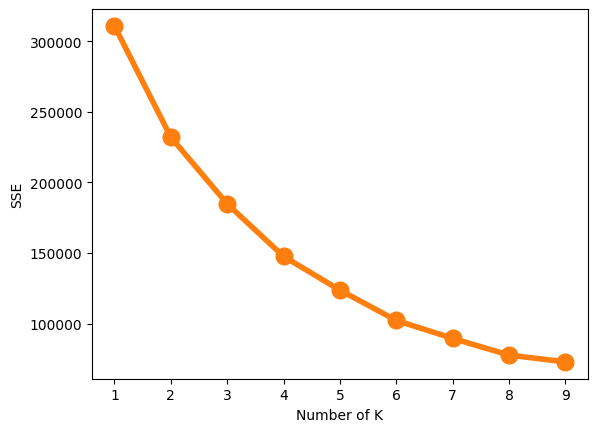

In [65]:
plt.plot(k_range, sse)
plt.plot(range(1,10),sse, linewidth=4, markersize=12,marker='o')
plt.xlabel('Number of K')
plt.ylabel('SSE')
plt.show()

In [66]:
Kmeans = KMeans(n_clusters=5, init = "k-means++", random_state = 0)

In [67]:
pipe = make_pipeline(column_trans, Kmeans)

In [68]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(feature_range=(1,
                                                                              10)),
                                                  ['Age', 'Annual Income',
                                                   'Spending Score'])])),
                ('kmeans', KMeans(n_clusters=5, random_state=0))])

In [69]:
clusters = pipe.fit_predict(X)

In [70]:
X["Cluster"] = clusters

In [71]:
X.head()

,Age,Annual Income,Spending Score,Cluster
0,30,151479,89,1
1,58,185088,95,2
2,62,70912,76,4
3,23,55460,57,3
4,24,153752,76,1


In [72]:
import pickle
pickle.dump(pipe,open("kmeans.pkl","wb"))

In [73]:
model=pickle.load(open('kmeans.pkl','rb'))

In [94]:
new_data=pd.read_csv("/kaggle/input/segdata/Mall_Customers.csv")
new_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [103]:
new_data = new_data.rename(columns={'Annual_Income': 'Annual Income', 'Spending_Score': 'Spending Score'})

In [109]:
new_data=new_data.iloc[:,2:]

In [113]:
new_data.shape

(200, 3)

In [110]:
new_data.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [122]:
pipe.fit_predict(new_data)

array([3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1, 3, 1, 3, 1, 4, 1, 3, 1,
       4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1,
       4, 1, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3,
       4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3,
       3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4,
       4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 2, 2, 3, 2, 0, 2, 0, 2, 0, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 4, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [119]:
ddd=new_data
ddd=ddd.iloc[:6,:]


In [121]:
pipe.fit_predict(ddd)

array([3, 4, 2, 1, 0, 1], dtype=int32)